In [ ]:
from google.colab import drive

drive.mount('\content')

In [ ]:
import pandas as pd

df1 = pd.read_csv('https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/Twitter_Emotion_Dataset.csv')
df1.columns = ['emotion', 'text']
df1['emotion'] = df1['emotion'].apply(lambda x: x.capitalize())
df1['text'] = df1['text'].apply(lambda x: x.replace('[USERNAME] ', ''))
df1.insert(loc=0, column='text', value=df1.pop('text'))
print(f'jumlah dataset: {len(df1)}')
df1.head(21)

jumlah dataset_2: 4401


,text,emotion
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",Anger
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",Anger
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,Happy
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",Anger
4,"Sharing pengalaman aja, kemarin jam 18.00 bata...",Happy
5,"Dari sekian banyak thread yang aku baca, threa...",Anger
6,Sharing sama temen tuh emg guna bgt. Disaat lu...,Happy
7,Orang lain kalau pake ponco itu buat jas hujan...,Sadness
8,"Contoh mereka yg gemar menyudutkan, teriak pal...",Anger
9,Pulang udah H-4 lebaran dilema sekali. Seperti...,Sadness


In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/azizp128/Emotion-Predictor-App/main/dataset/train_preprocess.csv')
df2.columns = ['emotion', 'text']
df2['emotion'] = df2['emotion'].apply(lambda x: x.capitalize())
df2['text'] = df2['text'].apply(lambda x: x.replace('[USERNAME] ', ''))
df2.insert(loc=0, column='text', value=df2.pop('text'))
df2.head(3)

,text,emotion
0,Ini adalah hal yang paling membahagiakan saat ...,Happy
1,"Dari pertama menduduki bangku jabatan anda, ra...",Anger
2,yaudah kalo emang belum berani potong rambut p...,Fear


In [ ]:
df3 = pd.read_csv('https://raw.githubusercontent.com/azizp128/Emotion-Predictor-App/main/dataset/valid_preprocess.csv')
df3.columns = ['emotion', 'text']
df3['emotion'] = df3['emotion'].apply(lambda x: x.capitalize())
df3['text'] = df3['text'].apply(lambda x: x.replace('[USERNAME] ', ''))
df3.insert(loc=0, column='text', value=df3.pop('text'))
df3.head(3)

,text,emotion
0,jaringannya mati ya? Tidak bisa dibuka mobile ...,Anger
1,It's like a circle of stupidity. Atlit gak diu...,Anger
2,"Koq Ngabalin di sebut tokoh, gak salah tuh, hi...",Anger


In [ ]:
df = pd.concat([df1, df2, df3], axis=0)
df = df.drop(index=df.index[df.emotion == 'Disgust'], axis=0)
df.index = [i for i in range(len(df))]
print(f'jumlah total dataset: {len(df)}')
df.tail(3)

jumlah total dataset: 7875


,text,emotion
7872,HAHAHA BODO AMAT DEEHHH YG PENTING DI VIDEO IN...,Love
7873,"Langsung mewek baca thread ini, keren maksimal...",Sadness
7874,aku rasa hidup tanpa jiwa orang yang miskin at...,Sadness


jumlah masing-masing label: 
Anger      1977
Happy      1825
Sadness    1799
Fear       1140
Love       1134
Name: emotion, dtype: int64


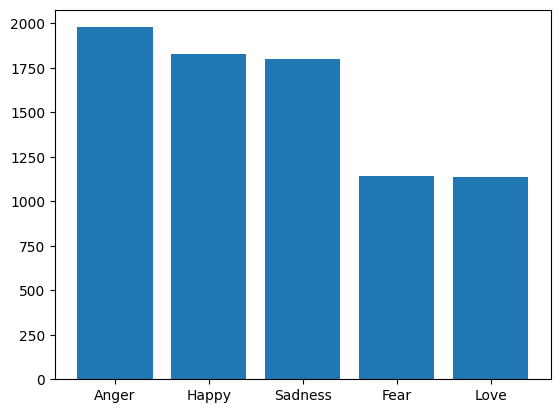

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

label = df['emotion'].value_counts().index
label = np.asarray(label)

counts = df['emotion'].value_counts()
print(f'jumlah masing-masing label: \n{counts}')

plt.bar(x=label, height=counts)
plt.show()

In [ ]:
df_nan = df[df.isna().any(axis=1)]
print(f'total missing value: {len(df_nan)}')
df = df.dropna(axis=0)
print(f'total data setelah proses drop missing value: {len(df)}')

total missing value: 0
total data setelah proses drop missing value: 7875


In [ ]:
from tokenizers import Tokenizer
from tokenizers.models import WordPiece

tokenizer = Tokenizer(WordPiece(unk_token="[UNK]"))

In [ ]:
from tokenizers import normalizers
from tokenizers.normalizers import Lowercase, StripAccents
from string import punctuation

tokenizer.normalizer = normalizers.Sequence([Lowercase(), StripAccents()]) # normalizer untuk mengubah huruf besar menjadi kecil(Lowercase) dan menghilangkan tanda strip pada huruf(StripAccents)

df['text'] = df['text'].apply(lambda x: tokenizer.normalizer.normalize_str(x))
df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if char not in punctuation]))
df.head(3)

,text,emotion
0,soal jln jatibarupolisi tdk bs gertak gubernur...,Anger
1,sesama cewe lho kayaknya harusnya bisa lebih r...,Anger
2,kepingin gudeg mbarek bu hj amad foto dari goo...,Happy


In [ ]:
from tokenizers import pre_tokenizers
from tokenizers.pre_tokenizers import Whitespace, Digits

tokenizer.pre_tokenizer = pre_tokenizers.Sequence([Whitespace(), Digits(individual_digits=True)])
df['text'] = df['text'].apply(lambda x: tokenizer.pre_tokenizer.pre_tokenize_str(x))
df['text'].head(4)

0    [(soal, (0, 4)), (jln, (5, 8)), (jatibarupolis...
1    [(sesama, (0, 6)), (cewe, (7, 11)), (lho, (12,...
2    [(kepingin, (0, 8)), (gudeg, (9, 14)), (mbarek...
3    [(jln, (0, 3)), (jatibarubagian, (4, 18)), (da...
Name: text, dtype: object

In [ ]:
df['text'] = df['text'].apply(lambda x: [seq for seq, offset in x]) # mengambil sequence dari pre_tokenizer dan membuang offsetnya
df['text'].head(4)

0    [soal, jln, jatibarupolisi, tdk, bs, gertak, g...
1    [sesama, cewe, lho, kayaknya, harusnya, bisa, ...
2    [kepingin, gudeg, mbarek, bu, hj, amad, foto, ...
3    [jln, jatibarubagian, dari, wilayah, tn, abang...
Name: text, dtype: object

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words_id = stopwords.words('indonesian')

df['text'] = df['text'].apply(lambda x: [seq for seq in x if seq not in stop_words_id])
df.head(3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,emotion
0,"[jln, jatibarupolisi, tdk, bs, gertak, gubernu...",Anger
1,"[cewe, lho, kayaknya, rasain, sibuk, jaga, ras...",Anger
2,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...",Happy


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
label_encode = encoder.fit_transform(df['emotion'].values) # proses one hot encoding menggunakan sklearn

In [ ]:
from tensorflow.keras.utils import to_categorical

X = df['text'].values
y = to_categorical(label_encode) # contoh dari proses to_categorical: [4] menjadi [0, 0, 0, 0, 1]
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
from tokenizers.trainers import WordPieceTrainer

trainer = WordPieceTrainer(special_tokens=["[PAD]", "[START]", "[END]", "[UNK]"])
tokenizer.train_from_iterator(X, trainer)

In [ ]:
from tokenizers.processors import TemplateProcessing

tokenizer.post_processor = TemplateProcessing(
         single="[START] $A [END]", # penambahan [START] untuk mengawali kalimat dan [END] untuk mengakhiri kalimat
         special_tokens=[
              ("[START]", tokenizer.token_to_id("[START]")),
              ("[END]", tokenizer.token_to_id("[END]")),
         ]
)

In [ ]:
tokenizer.save('tokenizer.json')

In [ ]:
vocab = tokenizer.get_vocab()
max_vocab = len(vocab)
max_len = max([len(idx) for idx in X]) # panjang maksimal kalimat di dalam dataset
print(f'panjang maksimal kalimat dari dataset: {max_len}')
print(f'jumlah total vocab: {max_vocab}')

max_len = int(max_len*0.5) # panjang kalimat saat padding adalah 50% dari panjang kalimat sebenarnya
print(f'panjang kalimat yang digunakan setelah padding: {max_len}')

panjang maksimal kalimat dari dataset: 66
jumlah total vocab: 29607
panjang kalimat yang digunakan setelah padding: 33


In [ ]:
tokenizer.enable_padding(
    pad_id=0,
    pad_type_id=0,
    pad_token='[PAD]',
    length=max_len
)
tokenizer.enable_truncation(max_length=max_len)

In [ ]:
tokenizer.padding

{'length': 33,
 'pad_to_multiple_of': None,
 'pad_id': 0,
 'pad_token': '[PAD]',
 'pad_type_id': 0,
 'direction': 'right'}

In [ ]:
test_typo_output = tokenizer.encode_batch(['hebat bener itu bocah', 'hbat bnr tu bcah', 'hbt bner it boch'])
print(test_typo_output[0].tokens) # setiap text yg typo akan ditokenisasi
print(test_typo_output[1].tokens)
print(test_typo_output[2].tokens)

['[START]', 'hebat', 'bener', 'itu', 'bocah', '[END]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
['[START]', 'h', '##bat', 'bnr', 'tu', 'bca', '##h', '[END]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
['[START]', 'h', '##bt', 'bner', 'it', 'boc', '##h', '[END]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [ ]:
X = [' '.join(x) for x in X]
X = tokenizer.encode_batch(X) # mengembalikkan nilai token dan id untuk setiap kalimat
X = [x.ids for x in X] # mengubah nilai X berupa id yg sudah di encode
X = np.asarray(X)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

cw = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(label_encode),
    y=label_encode
)
cw_dict = {i: cw[i] for i in range(len(cw))}

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense

model = Sequential([
    Embedding(input_dim=max_vocab, output_dim=16, input_length=max_len),
    Bidirectional(LSTM(16, activation='relu', dropout=0.3, recurrent_dropout=0.3)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

optimizer = tf.keras.optimizers.AdamW(7e-4)
loss = tf.keras.losses.CategoricalCrossentropy()

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 33, 16)            473712    
                                                                 
 bidirectional_22 (Bidirect  (None, 32)                4224      
 ional)                                                          
                                                                 
 dense_46 (Dense)            (None, 128)               4224      
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_47 (Dense)            (None, 5)                 645       
                                                                 
Total params: 482805 (1.84 MB)
Trainable params: 482805 (1.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

callback = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# tqdm(model.fit(
#        x=x_train,
#        y=y_train,
#        batch_size=64,
#        epochs=100,
#        validation_data=(x_test, y_test),
#        callbacks=[callback],
#        class_weight=cw_dict,
#        verbose=2
#               )
#     )
# model.save('/content/content/MyDrive/model.nlp')

In [ ]:
print(f'panjang dari x_train: {len(x_train)}')
print(f'panjang dari x_test: {len(x_test)}')
print(f'panjang dari y_train: {len(y_train)}')
print(f'panjang dari y_test: {len(y_test)}')

panjang dari x_train: 6300
panjang dari x_test: 1575
panjang dari y_train: 6300
panjang dari y_test: 1575


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

classes = np.unique(label_encode)
pred_report = model.predict(x_test)

y_true = []
y_pred = []

for i in y_test:
  for j in classes:
    if np.argmax(i) == j:
      y_true.append(j)

for i in pred_report:
  for j in classes:
    if np.argmax(i) == j:
      y_pred.append(j)

class_report = classification_report(
    y_true=y_true,
    y_pred=y_pred
)
print(class_report)

50/50 [==============================] - 2s 17ms/step
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       431
           1       0.88      0.89      0.89       213
           2       0.88      0.87      0.88       356
           3       0.91      0.90      0.91       207
           4       0.87      0.82      0.84       368

    accuracy                           0.88      1575
   macro avg       0.88      0.88      0.88      1575
weighted avg       0.88      0.88      0.88      1575



In [ ]:
from tokenizers import Tokenizer
from tensorflow.keras.models import load_model

max_len = 33

tokenizer = Tokenizer.from_file('tokenizer.json')
tokenizer.enable_padding(
    pad_id=0,
    pad_type_id=0,
    pad_token='[PAD]',
    length=max_len
)
tokenizer.enable_truncation(max_length=max_len)

model = load_model(f'/content/content/MyDrive/model.nlp')

In [ ]:
import tensorflow as tf
from tokenizers import pre_tokenizers
from tokenizers.pre_tokenizers import Whitespace, Digits

list_of_text = [
       "Nangis campur sedih gw kemarin Indonesia dibantai Australia smpe 4-0, dahlah",
       "Hari ini gw sial bangt sumpah, udah akun ml ilang kena scam orng, main game gacha ampas mulu tai lah",
       "sayang banget sma pacarku yg pengertian hehe",
       "Bahagia itu sederhana, bisa mewujudkan hobi yg dari kecil kalian pengen tpi belum kesampean☝😁",
       "Serem njir nonton film siksa kubur 💀, jadi keinget dosa2 💀 wkwk. Ngeri2 gmn gitu"
]
label = ['Anger', 'Fear', 'Happy', 'Love', 'Sadness']
text_pre_tokenizer = pre_tokenizers.Sequence([Whitespace(), Digits(individual_digits=True)])

for text in list_of_text:
  text = text.lower()
  print(text)
  text = text_pre_tokenizer.pre_tokenize_str(text)
  text = ' '.join([seq for seq, offset in text])
  text = tokenizer.encode(text)
  text = tf.constant([text.ids])

  pred = model.predict(text)[0]

  for idx in range(len(label)):
    if np.argmax(pred) == idx:
      print(f'emotion: {label[idx]}\npresentase: {np.max(pred)*100:.0f}%')
      print()

nangis campur sedih gw kemarin indonesia dibantai australia smpe 4-0, dahlah
1/1 [==============================] - 0s 103ms/step
emotion: Sadness
presentase: 83%

hari ini gw sial bangt sumpah, udah akun ml ilang kena scam orng, main game gacha ampas mulu tai lah
1/1 [==============================] - 0s 102ms/step
emotion: Anger
presentase: 96%

sayang banget sma pacarku yg pengertian hehe
1/1 [==============================] - 0s 43ms/step
emotion: Love
presentase: 94%

bahagia itu sederhana, bisa mewujudkan hobi yg dari kecil kalian pengen tpi belum kesampean☝😁
1/1 [==============================] - 0s 82ms/step
emotion: Happy
presentase: 85%

serem njir nonton film siksa kubur 💀, jadi keinget dosa2 💀 wkwk. ngeri2 gmn gitu
1/1 [==============================] - 0s 77ms/step
emotion: Fear
presentase: 98%

